In [5]:
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as CM
from tqdm import tqdm
from config import Config

from model import CSRNet
from dataset import *

In [6]:
def cal_mae(img_root,gt_dmap_root,model_param_path, dataset):
    '''
    Calculate the MAE of the test data.
    img_root: the root of test image data.
    gt_dmap_root: the root of test ground truth density-map data.
    model_param_path: the path of specific mcnn parameters.
    '''
    cfg= Config()
    #device= cfg.device
    device = torch.device("cpu")
    model=CSRNet()
    #model.load_state_dict(torch.load(model_param_path))
    torch.load(model_param_path, map_location=lambda storage, loc: storage)
    model.to(device)
    """
    @Mushy 
    Changed data loader to give path From config device 
    
    """

    dataloader = create_test_dataloader(dataset)
    #dataloader=torch.utils.data.DataLoader(dataset,batch_size=1,shuffle=False)
    model.eval()
    mae=0
    with torch.no_grad():
        for i,data in enumerate(tqdm(dataloader)):
            """
            @Mushy 
            Changed how to access the data . 
            """

            img= data['image'].to(device)
            #gt_dmap=gt_dmap.to(device)
            gt_dmap = data['densitymap'].to(device)
            # forward propagation
            et_dmap=model(img)
            mae+=abs(et_dmap.data.sum()-gt_dmap.data.sum()).item()
            del img,gt_dmap,et_dmap

    print("model_param_path:"+model_param_path+" mae:"+str(mae/len(dataloader)))

In [7]:
def estimate_density_map(img_root,gt_dmap_root,model_param_path,index, dataset):
    '''

    @Mushy Hi Jess I made similar changes jere
    You the best.
    Show one estimated density-map.
    img_root: the root of test image data.
    gt_dmap_root: the root of test ground truth density-map data.
    model_param_path: the path of specific mcnn parameters.
    index: the order of the test image in test dataset.
    '''
    device=torch.device("cpu")
    model=CSRNet().to(device)
    #model.load_state_dict(torch.load(model_param_path))
    torch.load(model_param_path, map_location=lambda storage, loc: storage)
    cfg = Config()
    dataloader = create_test_dataloader(dataset)
    model.eval()
    for i,data in enumerate(dataloader):
        if i==index:
            img = data['image'].to(device)
            # gt_dmap=gt_dmap.to(device)
            gt_dmap = data['densitymap'].to(device)
            # forward propagation
            et_dmap=model(img).detach()
            et_dmap=et_dmap.squeeze(0).squeeze(0).cpu().numpy()
            print(et_dmap.shape)
            plt.imshow(et_dmap,cmap=CM.gray)
            plt.show()
            break


  0%|          | 0/182 [00:00<?, ?it/s]

Before backend torch.Size([1, 512, 96, 128])



  1%|          | 1/182 [00:06<19:53,  6.60s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 84, 128])



  1%|          | 2/182 [00:13<19:37,  6.54s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 74, 112])



  2%|▏         | 3/182 [00:18<18:17,  6.13s/it]

After backend torch.Size([1, 64, 74, 112])
After output layer:  torch.Size([1, 1, 74, 112])
Final out torch.Size([1, 1, 592, 896])
Before backend torch.Size([1, 512, 82, 128])



  2%|▏         | 4/182 [00:24<18:03,  6.08s/it]

After backend torch.Size([1, 64, 82, 128])
After output layer:  torch.Size([1, 1, 82, 128])
Final out torch.Size([1, 1, 656, 1024])
Before backend torch.Size([1, 512, 88, 128])



  3%|▎         | 5/182 [00:30<18:21,  6.22s/it]

After backend torch.Size([1, 64, 88, 128])
After output layer:  torch.Size([1, 1, 88, 128])
Final out torch.Size([1, 1, 704, 1024])



  3%|▎         | 6/182 [00:31<13:46,  4.70s/it]

Before backend torch.Size([1, 512, 34, 56])
After backend torch.Size([1, 64, 34, 56])
After output layer:  torch.Size([1, 1, 34, 56])
Final out torch.Size([1, 1, 272, 448])
Before backend torch.Size([1, 512, 48, 74])



  4%|▍         | 7/182 [00:34<11:37,  3.98s/it]

After backend torch.Size([1, 64, 48, 74])
After output layer:  torch.Size([1, 1, 48, 74])
Final out torch.Size([1, 1, 384, 592])
Before backend torch.Size([1, 512, 84, 128])



  4%|▍         | 8/182 [00:40<13:27,  4.64s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



  5%|▍         | 9/182 [00:46<14:32,  5.04s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 72, 128])



  5%|▌         | 10/182 [00:51<14:32,  5.08s/it]

After backend torch.Size([1, 64, 72, 128])
After output layer:  torch.Size([1, 1, 72, 128])
Final out torch.Size([1, 1, 576, 1024])
Before backend torch.Size([1, 512, 52, 78])



  6%|▌         | 11/182 [00:54<12:32,  4.40s/it]

After backend torch.Size([1, 64, 52, 78])
After output layer:  torch.Size([1, 1, 52, 78])
Final out torch.Size([1, 1, 416, 624])
Before backend torch.Size([1, 512, 50, 112])



  7%|▋         | 12/182 [00:57<11:37,  4.11s/it]

After backend torch.Size([1, 64, 50, 112])
After output layer:  torch.Size([1, 1, 50, 112])
Final out torch.Size([1, 1, 400, 896])
Before backend torch.Size([1, 512, 96, 128])



  7%|▋         | 13/182 [01:04<13:30,  4.80s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 84, 128])



  8%|▊         | 14/182 [01:09<14:02,  5.02s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 52, 80])



  8%|▊         | 15/182 [01:11<11:38,  4.18s/it]

After backend torch.Size([1, 64, 52, 80])
After output layer:  torch.Size([1, 1, 52, 80])
Final out torch.Size([1, 1, 416, 640])
Before backend torch.Size([1, 512, 76, 50])



  9%|▉         | 16/182 [01:14<10:05,  3.65s/it]

After backend torch.Size([1, 64, 76, 50])
After output layer:  torch.Size([1, 1, 76, 50])
Final out torch.Size([1, 1, 608, 400])
Before backend torch.Size([1, 512, 96, 120])



  9%|▉         | 17/182 [01:21<12:45,  4.64s/it]

After backend torch.Size([1, 64, 96, 120])
After output layer:  torch.Size([1, 1, 96, 120])
Final out torch.Size([1, 1, 768, 960])
Before backend torch.Size([1, 512, 96, 128])



 10%|▉         | 18/182 [01:27<14:03,  5.15s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 10%|█         | 19/182 [01:34<15:02,  5.54s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 52, 66])



 11%|█         | 20/182 [01:36<12:13,  4.53s/it]

After backend torch.Size([1, 64, 52, 66])
After output layer:  torch.Size([1, 1, 52, 66])
Final out torch.Size([1, 1, 416, 528])
Before backend torch.Size([1, 512, 82, 128])



 12%|█▏        | 21/182 [01:41<12:47,  4.77s/it]

After backend torch.Size([1, 64, 82, 128])
After output layer:  torch.Size([1, 1, 82, 128])
Final out torch.Size([1, 1, 656, 1024])
Before backend torch.Size([1, 512, 84, 128])



 12%|█▏        | 22/182 [01:47<13:17,  4.98s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 62, 128])



 13%|█▎        | 23/182 [01:51<13:11,  4.98s/it]

After backend torch.Size([1, 64, 62, 128])
After output layer:  torch.Size([1, 1, 62, 128])
Final out torch.Size([1, 1, 496, 1024])
Before backend torch.Size([1, 512, 84, 128])



 13%|█▎        | 24/182 [01:57<13:35,  5.16s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 14%|█▎        | 25/182 [02:03<13:51,  5.30s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])



 14%|█▍        | 26/182 [02:04<10:35,  4.07s/it]

Before backend torch.Size([1, 512, 54, 36])
After backend torch.Size([1, 64, 54, 36])
After output layer:  torch.Size([1, 1, 54, 36])
Final out torch.Size([1, 1, 432, 288])
Before backend torch.Size([1, 512, 84, 128])



 15%|█▍        | 27/182 [02:09<11:39,  4.51s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 15%|█▌        | 28/182 [02:15<12:24,  4.84s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 62, 124])



 16%|█▌        | 29/182 [02:20<12:29,  4.90s/it]

After backend torch.Size([1, 64, 62, 124])
After output layer:  torch.Size([1, 1, 62, 124])
Final out torch.Size([1, 1, 496, 992])
Before backend torch.Size([1, 512, 84, 128])



 16%|█▋        | 30/182 [02:26<12:55,  5.10s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])



 17%|█▋        | 31/182 [02:27<10:10,  4.04s/it]

Before backend torch.Size([1, 512, 40, 62])
After backend torch.Size([1, 64, 40, 62])
After output layer:  torch.Size([1, 1, 40, 62])
Final out torch.Size([1, 1, 320, 496])
Before backend torch.Size([1, 512, 90, 120])



 18%|█▊        | 32/182 [02:34<12:23,  4.95s/it]

After backend torch.Size([1, 64, 90, 120])
After output layer:  torch.Size([1, 1, 90, 120])
Final out torch.Size([1, 1, 720, 960])
Before backend torch.Size([1, 512, 58, 124])



 18%|█▊        | 33/182 [02:39<11:57,  4.81s/it]

After backend torch.Size([1, 64, 58, 124])
After output layer:  torch.Size([1, 1, 58, 124])
Final out torch.Size([1, 1, 464, 992])



 19%|█▊        | 34/182 [02:40<09:14,  3.75s/it]

Before backend torch.Size([1, 512, 40, 62])
After backend torch.Size([1, 64, 40, 62])
After output layer:  torch.Size([1, 1, 40, 62])
Final out torch.Size([1, 1, 320, 496])
Before backend torch.Size([1, 512, 96, 128])



 19%|█▉        | 35/182 [02:47<11:11,  4.57s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 56, 86])



 20%|█▉        | 36/182 [02:49<09:56,  4.08s/it]

After backend torch.Size([1, 64, 56, 86])
After output layer:  torch.Size([1, 1, 56, 86])
Final out torch.Size([1, 1, 448, 688])
There is a grayscale image.
Before backend torch.Size([1, 512, 62, 128])



 20%|██        | 37/182 [02:54<10:00,  4.14s/it]

After backend torch.Size([1, 64, 62, 128])
After output layer:  torch.Size([1, 1, 62, 128])
Final out torch.Size([1, 1, 496, 1024])
Before backend torch.Size([1, 512, 84, 128])



 21%|██        | 38/182 [02:59<11:00,  4.59s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 86, 128])



 21%|██▏       | 39/182 [03:06<12:06,  5.08s/it]

After backend torch.Size([1, 64, 86, 128])
After output layer:  torch.Size([1, 1, 86, 128])
Final out torch.Size([1, 1, 688, 1024])
Before backend torch.Size([1, 512, 46, 70])



 22%|██▏       | 40/182 [03:08<09:51,  4.16s/it]

After backend torch.Size([1, 64, 46, 70])
After output layer:  torch.Size([1, 1, 46, 70])
Final out torch.Size([1, 1, 368, 560])
Before backend torch.Size([1, 512, 84, 128])



 23%|██▎       | 41/182 [03:13<10:51,  4.62s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 74, 100])



 23%|██▎       | 42/182 [03:18<10:49,  4.64s/it]

After backend torch.Size([1, 64, 74, 100])
After output layer:  torch.Size([1, 1, 74, 100])
Final out torch.Size([1, 1, 592, 800])
Before backend torch.Size([1, 512, 54, 80])



 24%|██▎       | 43/182 [03:21<09:23,  4.06s/it]

After backend torch.Size([1, 64, 54, 80])
After output layer:  torch.Size([1, 1, 54, 80])
Final out torch.Size([1, 1, 432, 640])
Before backend torch.Size([1, 512, 96, 128])



 24%|██▍       | 44/182 [03:27<11:03,  4.81s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])



 25%|██▍       | 45/182 [03:29<08:47,  3.85s/it]

Before backend torch.Size([1, 512, 44, 58])
After backend torch.Size([1, 64, 44, 58])
After output layer:  torch.Size([1, 1, 44, 58])
Final out torch.Size([1, 1, 352, 464])
Before backend torch.Size([1, 512, 66, 120])



 25%|██▌       | 46/182 [03:34<09:27,  4.17s/it]

After backend torch.Size([1, 64, 66, 120])
After output layer:  torch.Size([1, 1, 66, 120])
Final out torch.Size([1, 1, 528, 960])
Before backend torch.Size([1, 512, 58, 128])



 26%|██▌       | 47/182 [03:39<09:44,  4.33s/it]

After backend torch.Size([1, 64, 58, 128])
After output layer:  torch.Size([1, 1, 58, 128])
Final out torch.Size([1, 1, 464, 1024])
Before backend torch.Size([1, 512, 92, 128])



 26%|██▋       | 48/182 [03:46<11:46,  5.27s/it]

After backend torch.Size([1, 64, 92, 128])
After output layer:  torch.Size([1, 1, 92, 128])
Final out torch.Size([1, 1, 736, 1024])
Before backend torch.Size([1, 512, 128, 92])



 27%|██▋       | 49/182 [03:54<13:22,  6.03s/it]

After backend torch.Size([1, 64, 128, 92])
After output layer:  torch.Size([1, 1, 128, 92])
Final out torch.Size([1, 1, 1024, 736])
Before backend torch.Size([1, 512, 60, 80])



 27%|██▋       | 50/182 [03:57<11:23,  5.18s/it]

After backend torch.Size([1, 64, 60, 80])
After output layer:  torch.Size([1, 1, 60, 80])
Final out torch.Size([1, 1, 480, 640])
Before backend torch.Size([1, 512, 60, 80])



 28%|██▊       | 51/182 [03:59<09:27,  4.33s/it]

After backend torch.Size([1, 64, 60, 80])
After output layer:  torch.Size([1, 1, 60, 80])
Final out torch.Size([1, 1, 480, 640])
Before backend torch.Size([1, 512, 54, 128])



 29%|██▊       | 52/182 [04:04<09:25,  4.35s/it]

After backend torch.Size([1, 64, 54, 128])
After output layer:  torch.Size([1, 1, 54, 128])
Final out torch.Size([1, 1, 432, 1024])
Before backend torch.Size([1, 512, 52, 74])



 29%|██▉       | 53/182 [04:06<08:08,  3.79s/it]

After backend torch.Size([1, 64, 52, 74])
After output layer:  torch.Size([1, 1, 52, 74])
Final out torch.Size([1, 1, 416, 592])
There is a grayscale image.
Before backend torch.Size([1, 512, 88, 128])



 30%|██▉       | 54/182 [04:13<10:16,  4.82s/it]

After backend torch.Size([1, 64, 88, 128])
After output layer:  torch.Size([1, 1, 88, 128])
Final out torch.Size([1, 1, 704, 1024])
Before backend torch.Size([1, 512, 62, 80])



 30%|███       | 55/182 [04:17<09:16,  4.38s/it]

After backend torch.Size([1, 64, 62, 80])
After output layer:  torch.Size([1, 1, 62, 80])
Final out torch.Size([1, 1, 496, 640])
Before backend torch.Size([1, 512, 84, 128])



 31%|███       | 56/182 [04:23<10:14,  4.88s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 50, 70])



 31%|███▏      | 57/182 [04:25<08:25,  4.04s/it]

After backend torch.Size([1, 64, 50, 70])
After output layer:  torch.Size([1, 1, 50, 70])
Final out torch.Size([1, 1, 400, 560])
Before backend torch.Size([1, 512, 56, 76])



 32%|███▏      | 58/182 [04:27<07:24,  3.59s/it]

After backend torch.Size([1, 64, 56, 76])
After output layer:  torch.Size([1, 1, 56, 76])
Final out torch.Size([1, 1, 448, 608])
Before backend torch.Size([1, 512, 42, 106])



 32%|███▏      | 59/182 [04:30<06:46,  3.31s/it]

After backend torch.Size([1, 64, 42, 106])
After output layer:  torch.Size([1, 1, 42, 106])
Final out torch.Size([1, 1, 336, 848])
There is a grayscale image.
Before backend torch.Size([1, 512, 94, 128])



 33%|███▎      | 60/182 [04:37<09:08,  4.49s/it]

After backend torch.Size([1, 64, 94, 128])
After output layer:  torch.Size([1, 1, 94, 128])
Final out torch.Size([1, 1, 752, 1024])
Before backend torch.Size([1, 512, 50, 84])



 34%|███▎      | 61/182 [04:40<07:56,  3.94s/it]

After backend torch.Size([1, 64, 50, 84])
After output layer:  torch.Size([1, 1, 50, 84])
Final out torch.Size([1, 1, 400, 672])
Before backend torch.Size([1, 512, 58, 78])



 34%|███▍      | 62/182 [04:43<07:10,  3.59s/it]

After backend torch.Size([1, 64, 58, 78])
After output layer:  torch.Size([1, 1, 58, 78])
Final out torch.Size([1, 1, 464, 624])
There is a grayscale image.
Before backend torch.Size([1, 512, 48, 74])



 35%|███▍      | 63/182 [04:45<06:08,  3.09s/it]

After backend torch.Size([1, 64, 48, 74])
After output layer:  torch.Size([1, 1, 48, 74])
Final out torch.Size([1, 1, 384, 592])
There is a grayscale image.
Before backend torch.Size([1, 512, 62, 80])



 35%|███▌      | 64/182 [04:47<05:42,  2.90s/it]

After backend torch.Size([1, 64, 62, 80])
After output layer:  torch.Size([1, 1, 62, 80])
Final out torch.Size([1, 1, 496, 640])
Before backend torch.Size([1, 512, 66, 120])



 36%|███▌      | 65/182 [04:51<06:19,  3.24s/it]

After backend torch.Size([1, 64, 66, 120])
After output layer:  torch.Size([1, 1, 66, 120])
Final out torch.Size([1, 1, 528, 960])
Before backend torch.Size([1, 512, 42, 128])



 36%|███▋      | 66/182 [04:55<06:22,  3.30s/it]

After backend torch.Size([1, 64, 42, 128])
After output layer:  torch.Size([1, 1, 42, 128])
Final out torch.Size([1, 1, 336, 1024])
Before backend torch.Size([1, 512, 88, 128])



 37%|███▋      | 67/182 [05:00<07:46,  4.05s/it]

After backend torch.Size([1, 64, 88, 128])
After output layer:  torch.Size([1, 1, 88, 128])
Final out torch.Size([1, 1, 704, 1024])



 37%|███▋      | 68/182 [05:02<06:05,  3.21s/it]

Before backend torch.Size([1, 512, 44, 58])
After backend torch.Size([1, 64, 44, 58])
After output layer:  torch.Size([1, 1, 44, 58])
Final out torch.Size([1, 1, 352, 464])
Before backend torch.Size([1, 512, 92, 128])



 38%|███▊      | 69/182 [05:08<07:39,  4.07s/it]

After backend torch.Size([1, 64, 92, 128])
After output layer:  torch.Size([1, 1, 92, 128])
Final out torch.Size([1, 1, 736, 1024])
Before backend torch.Size([1, 512, 74, 112])



 38%|███▊      | 70/182 [05:12<07:54,  4.23s/it]

After backend torch.Size([1, 64, 74, 112])
After output layer:  torch.Size([1, 1, 74, 112])
Final out torch.Size([1, 1, 592, 896])
Before backend torch.Size([1, 512, 66, 128])



 39%|███▉      | 71/182 [05:18<08:25,  4.56s/it]

After backend torch.Size([1, 64, 66, 128])
After output layer:  torch.Size([1, 1, 66, 128])
Final out torch.Size([1, 1, 528, 1024])
Before backend torch.Size([1, 512, 66, 100])



 40%|███▉      | 72/182 [05:22<08:04,  4.40s/it]

After backend torch.Size([1, 64, 66, 100])
After output layer:  torch.Size([1, 1, 66, 100])
Final out torch.Size([1, 1, 528, 800])
Before backend torch.Size([1, 512, 56, 84])



 40%|████      | 73/182 [05:25<07:12,  3.97s/it]

After backend torch.Size([1, 64, 56, 84])
After output layer:  torch.Size([1, 1, 56, 84])
Final out torch.Size([1, 1, 448, 672])
Before backend torch.Size([1, 512, 60, 78])



 41%|████      | 74/182 [05:28<06:32,  3.63s/it]

After backend torch.Size([1, 64, 60, 78])
After output layer:  torch.Size([1, 1, 60, 78])
Final out torch.Size([1, 1, 480, 624])
Before backend torch.Size([1, 512, 84, 128])



 41%|████      | 75/182 [05:33<07:32,  4.23s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 42%|████▏     | 76/182 [05:39<08:11,  4.64s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 72, 110])



 42%|████▏     | 77/182 [05:44<08:21,  4.78s/it]

After backend torch.Size([1, 64, 72, 110])
After output layer:  torch.Size([1, 1, 72, 110])
Final out torch.Size([1, 1, 576, 880])
Before backend torch.Size([1, 512, 52, 74])



 43%|████▎     | 78/182 [05:46<06:47,  3.91s/it]

After backend torch.Size([1, 64, 52, 74])
After output layer:  torch.Size([1, 1, 52, 74])
Final out torch.Size([1, 1, 416, 592])
Before backend torch.Size([1, 512, 32, 86])
After backend torch.Size([1, 64, 32, 86])
After output layer:  torch.Size([1, 1, 32, 86])



 43%|████▎     | 79/182 [05:47<05:33,  3.24s/it]

Final out torch.Size([1, 1, 256, 688])
Before backend torch.Size([1, 512, 84, 128])



 44%|████▍     | 80/182 [05:53<06:44,  3.97s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 80, 128])



 45%|████▍     | 81/182 [06:00<07:56,  4.72s/it]

After backend torch.Size([1, 64, 80, 128])
After output layer:  torch.Size([1, 1, 80, 128])
Final out torch.Size([1, 1, 640, 1024])
Before backend torch.Size([1, 512, 96, 128])



 45%|████▌     | 82/182 [06:07<09:00,  5.41s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 46%|████▌     | 83/182 [06:13<09:26,  5.72s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 84, 128])



 46%|████▌     | 84/182 [06:19<09:17,  5.69s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 72, 128])



 47%|████▋     | 85/182 [06:24<08:59,  5.56s/it]

After backend torch.Size([1, 64, 72, 128])
After output layer:  torch.Size([1, 1, 72, 128])
Final out torch.Size([1, 1, 576, 1024])



 47%|████▋     | 86/182 [06:25<06:55,  4.33s/it]

Before backend torch.Size([1, 512, 34, 68])
After backend torch.Size([1, 64, 34, 68])
After output layer:  torch.Size([1, 1, 34, 68])
Final out torch.Size([1, 1, 272, 544])
Before backend torch.Size([1, 512, 84, 128])



 48%|████▊     | 87/182 [06:31<07:30,  4.74s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 48%|████▊     | 88/182 [06:37<07:51,  5.02s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 128, 84])



 49%|████▉     | 89/182 [06:44<08:38,  5.58s/it]

After backend torch.Size([1, 64, 128, 84])
After output layer:  torch.Size([1, 1, 128, 84])
Final out torch.Size([1, 1, 1024, 672])
Before backend torch.Size([1, 512, 72, 128])



 49%|████▉     | 90/182 [06:48<08:09,  5.32s/it]

After backend torch.Size([1, 64, 72, 128])
After output layer:  torch.Size([1, 1, 72, 128])
Final out torch.Size([1, 1, 576, 1024])
Before backend torch.Size([1, 512, 86, 128])



 50%|█████     | 91/182 [06:55<08:31,  5.62s/it]

After backend torch.Size([1, 64, 86, 128])
After output layer:  torch.Size([1, 1, 86, 128])
Final out torch.Size([1, 1, 688, 1024])
Before backend torch.Size([1, 512, 96, 128])



 51%|█████     | 92/182 [07:03<09:38,  6.43s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 40, 128])



 51%|█████     | 93/182 [07:06<08:09,  5.50s/it]

After backend torch.Size([1, 64, 40, 128])
After output layer:  torch.Size([1, 1, 40, 128])
Final out torch.Size([1, 1, 320, 1024])
Before backend torch.Size([1, 512, 86, 128])



 52%|█████▏    | 94/182 [07:13<08:23,  5.72s/it]

After backend torch.Size([1, 64, 86, 128])
After output layer:  torch.Size([1, 1, 86, 128])
Final out torch.Size([1, 1, 688, 1024])
Before backend torch.Size([1, 512, 42, 74])



 52%|█████▏    | 95/182 [07:15<06:43,  4.64s/it]

After backend torch.Size([1, 64, 42, 74])
After output layer:  torch.Size([1, 1, 42, 74])
Final out torch.Size([1, 1, 336, 592])
There is a grayscale image.
Before backend torch.Size([1, 512, 46, 68])



 53%|█████▎    | 96/182 [07:17<05:30,  3.84s/it]

After backend torch.Size([1, 64, 46, 68])
After output layer:  torch.Size([1, 1, 46, 68])
Final out torch.Size([1, 1, 368, 544])
Before backend torch.Size([1, 512, 84, 128])



 53%|█████▎    | 97/182 [07:23<06:34,  4.64s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 56, 128])



 54%|█████▍    | 98/182 [07:29<07:00,  5.01s/it]

After backend torch.Size([1, 64, 56, 128])
After output layer:  torch.Size([1, 1, 56, 128])
Final out torch.Size([1, 1, 448, 1024])
Before backend torch.Size([1, 512, 92, 128])



 54%|█████▍    | 99/182 [07:36<07:52,  5.70s/it]

After backend torch.Size([1, 64, 92, 128])
After output layer:  torch.Size([1, 1, 92, 128])
Final out torch.Size([1, 1, 736, 1024])
Before backend torch.Size([1, 512, 66, 104])



 55%|█████▍    | 100/182 [07:41<07:23,  5.41s/it]

After backend torch.Size([1, 64, 66, 104])
After output layer:  torch.Size([1, 1, 66, 104])
Final out torch.Size([1, 1, 528, 832])
There is a grayscale image.
Before backend torch.Size([1, 512, 82, 102])



 55%|█████▌    | 101/182 [07:46<07:15,  5.37s/it]

After backend torch.Size([1, 64, 82, 102])
After output layer:  torch.Size([1, 1, 82, 102])
Final out torch.Size([1, 1, 656, 816])
Before backend torch.Size([1, 512, 82, 124])



 56%|█████▌    | 102/182 [07:53<07:41,  5.77s/it]

After backend torch.Size([1, 64, 82, 124])
After output layer:  torch.Size([1, 1, 82, 124])
Final out torch.Size([1, 1, 656, 992])
Before backend torch.Size([1, 512, 58, 88])



 57%|█████▋    | 103/182 [07:57<06:47,  5.16s/it]

After backend torch.Size([1, 64, 58, 88])
After output layer:  torch.Size([1, 1, 58, 88])
Final out torch.Size([1, 1, 464, 704])
Before backend torch.Size([1, 512, 46, 68])



 57%|█████▋    | 104/182 [07:59<05:34,  4.28s/it]

After backend torch.Size([1, 64, 46, 68])
After output layer:  torch.Size([1, 1, 46, 68])
Final out torch.Size([1, 1, 368, 544])
Before backend torch.Size([1, 512, 68, 128])



 58%|█████▊    | 105/182 [08:06<06:30,  5.07s/it]

After backend torch.Size([1, 64, 68, 128])
After output layer:  torch.Size([1, 1, 68, 128])
Final out torch.Size([1, 1, 544, 1024])
Before backend torch.Size([1, 512, 84, 128])



 58%|█████▊    | 106/182 [08:13<07:16,  5.75s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 96, 128])



 59%|█████▉    | 107/182 [08:21<07:51,  6.29s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 84, 128])



 59%|█████▉    | 108/182 [08:27<07:45,  6.29s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 54, 68])



 60%|█████▉    | 109/182 [08:30<06:15,  5.14s/it]

After backend torch.Size([1, 64, 54, 68])
After output layer:  torch.Size([1, 1, 54, 68])
Final out torch.Size([1, 1, 432, 544])
Before backend torch.Size([1, 512, 84, 128])



 60%|██████    | 110/182 [08:37<07:01,  5.85s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 128, 124])



 61%|██████    | 111/182 [08:49<08:58,  7.59s/it]

After backend torch.Size([1, 64, 128, 124])
After output layer:  torch.Size([1, 1, 128, 124])
Final out torch.Size([1, 1, 1024, 992])
Before backend torch.Size([1, 512, 94, 128])



 62%|██████▏   | 112/182 [08:56<08:52,  7.61s/it]

After backend torch.Size([1, 64, 94, 128])
After output layer:  torch.Size([1, 1, 94, 128])
Final out torch.Size([1, 1, 752, 1024])
Before backend torch.Size([1, 512, 36, 56])



 62%|██████▏   | 113/182 [08:58<06:39,  5.79s/it]

After backend torch.Size([1, 64, 36, 56])
After output layer:  torch.Size([1, 1, 36, 56])
Final out torch.Size([1, 1, 288, 448])
Before backend torch.Size([1, 512, 84, 128])



 63%|██████▎   | 114/182 [09:04<06:50,  6.04s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 96, 128])



 63%|██████▎   | 115/182 [09:12<07:06,  6.37s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 82, 124])



 64%|██████▎   | 116/182 [09:18<07:04,  6.44s/it]

After backend torch.Size([1, 64, 82, 124])
After output layer:  torch.Size([1, 1, 82, 124])
Final out torch.Size([1, 1, 656, 992])
Before backend torch.Size([1, 512, 74, 128])



 64%|██████▍   | 117/182 [09:25<07:00,  6.47s/it]

After backend torch.Size([1, 64, 74, 128])
After output layer:  torch.Size([1, 1, 74, 128])
Final out torch.Size([1, 1, 592, 1024])
Before backend torch.Size([1, 512, 96, 128])



 65%|██████▍   | 118/182 [09:32<07:00,  6.56s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 42, 90])



 65%|██████▌   | 119/182 [09:34<05:34,  5.31s/it]

After backend torch.Size([1, 64, 42, 90])
After output layer:  torch.Size([1, 1, 42, 90])
Final out torch.Size([1, 1, 336, 720])
Before backend torch.Size([1, 512, 54, 128])



 66%|██████▌   | 120/182 [09:38<05:08,  4.98s/it]

After backend torch.Size([1, 64, 54, 128])
After output layer:  torch.Size([1, 1, 54, 128])
Final out torch.Size([1, 1, 432, 1024])
Before backend torch.Size([1, 512, 50, 74])



 66%|██████▋   | 121/182 [09:40<04:14,  4.17s/it]

After backend torch.Size([1, 64, 50, 74])
After output layer:  torch.Size([1, 1, 50, 74])
Final out torch.Size([1, 1, 400, 592])
Before backend torch.Size([1, 512, 88, 128])



 67%|██████▋   | 122/182 [09:47<04:57,  4.96s/it]

After backend torch.Size([1, 64, 88, 128])
After output layer:  torch.Size([1, 1, 88, 128])
Final out torch.Size([1, 1, 704, 1024])
Before backend torch.Size([1, 512, 76, 94])



 68%|██████▊   | 123/182 [09:52<04:47,  4.87s/it]

After backend torch.Size([1, 64, 76, 94])
After output layer:  torch.Size([1, 1, 76, 94])
Final out torch.Size([1, 1, 608, 752])
Before backend torch.Size([1, 512, 78, 116])



 68%|██████▊   | 124/182 [09:58<05:00,  5.18s/it]

After backend torch.Size([1, 64, 78, 116])
After output layer:  torch.Size([1, 1, 78, 116])
Final out torch.Size([1, 1, 624, 928])
Before backend torch.Size([1, 512, 96, 128])



 69%|██████▊   | 125/182 [10:06<05:39,  5.96s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])



 69%|██████▉   | 126/182 [10:07<04:18,  4.62s/it]

Before backend torch.Size([1, 512, 38, 62])
After backend torch.Size([1, 64, 38, 62])
After output layer:  torch.Size([1, 1, 38, 62])
Final out torch.Size([1, 1, 304, 496])
Before backend torch.Size([1, 512, 40, 66])
After backend torch.Size([1, 64, 40, 66])



 70%|██████▉   | 127/182 [10:09<03:24,  3.72s/it]

After output layer:  torch.Size([1, 1, 40, 66])
Final out torch.Size([1, 1, 320, 528])
Before backend torch.Size([1, 512, 46, 68])



 70%|███████   | 128/182 [10:10<02:48,  3.11s/it]

After backend torch.Size([1, 64, 46, 68])
After output layer:  torch.Size([1, 1, 46, 68])
Final out torch.Size([1, 1, 368, 544])



 71%|███████   | 129/182 [10:12<02:16,  2.57s/it]

Before backend torch.Size([1, 512, 34, 56])
After backend torch.Size([1, 64, 34, 56])
After output layer:  torch.Size([1, 1, 34, 56])
Final out torch.Size([1, 1, 272, 448])
Before backend torch.Size([1, 512, 86, 128])



 71%|███████▏  | 130/182 [10:19<03:22,  3.89s/it]

After backend torch.Size([1, 64, 86, 128])
After output layer:  torch.Size([1, 1, 86, 128])
Final out torch.Size([1, 1, 688, 1024])
Before backend torch.Size([1, 512, 84, 128])



 72%|███████▏  | 131/182 [10:25<03:52,  4.55s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 73%|███████▎  | 132/182 [10:30<04:03,  4.87s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 52, 80])



 73%|███████▎  | 133/182 [10:33<03:24,  4.17s/it]

After backend torch.Size([1, 64, 52, 80])
After output layer:  torch.Size([1, 1, 52, 80])
Final out torch.Size([1, 1, 416, 640])
Before backend torch.Size([1, 512, 48, 90])



 74%|███████▎  | 134/182 [10:36<02:58,  3.72s/it]

After backend torch.Size([1, 64, 48, 90])
After output layer:  torch.Size([1, 1, 48, 90])
Final out torch.Size([1, 1, 384, 720])
Before backend torch.Size([1, 512, 84, 128])



 74%|███████▍  | 135/182 [10:41<03:19,  4.24s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 75%|███████▍  | 136/182 [10:46<03:31,  4.60s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 44, 128])



 75%|███████▌  | 137/182 [10:50<03:11,  4.25s/it]

After backend torch.Size([1, 64, 44, 128])
After output layer:  torch.Size([1, 1, 44, 128])
Final out torch.Size([1, 1, 352, 1024])
There is a grayscale image.
Before backend torch.Size([1, 512, 54, 78])



 76%|███████▌  | 138/182 [10:52<02:44,  3.75s/it]

After backend torch.Size([1, 64, 54, 78])
After output layer:  torch.Size([1, 1, 54, 78])
Final out torch.Size([1, 1, 432, 624])
Before backend torch.Size([1, 512, 96, 128])



 76%|███████▋  | 139/182 [10:59<03:14,  4.52s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 50, 76])



 77%|███████▋  | 140/182 [11:01<02:42,  3.86s/it]

After backend torch.Size([1, 64, 50, 76])
After output layer:  torch.Size([1, 1, 50, 76])
Final out torch.Size([1, 1, 400, 608])
Before backend torch.Size([1, 512, 42, 92])



 77%|███████▋  | 141/182 [11:03<02:19,  3.41s/it]

After backend torch.Size([1, 64, 42, 92])
After output layer:  torch.Size([1, 1, 42, 92])
Final out torch.Size([1, 1, 336, 736])



 78%|███████▊  | 142/182 [11:04<01:44,  2.60s/it]

Before backend torch.Size([1, 512, 28, 42])
After backend torch.Size([1, 64, 28, 42])
After output layer:  torch.Size([1, 1, 28, 42])
Final out torch.Size([1, 1, 224, 336])
Before backend torch.Size([1, 512, 76, 128])



 79%|███████▊  | 143/182 [11:10<02:22,  3.66s/it]

After backend torch.Size([1, 64, 76, 128])
After output layer:  torch.Size([1, 1, 76, 128])
Final out torch.Size([1, 1, 608, 1024])
Before backend torch.Size([1, 512, 84, 128])



 79%|███████▉  | 144/182 [11:16<02:40,  4.21s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 80%|███████▉  | 145/182 [11:21<02:50,  4.60s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])



 80%|████████  | 146/182 [11:22<02:05,  3.49s/it]

Before backend torch.Size([1, 512, 28, 50])
After backend torch.Size([1, 64, 28, 50])
After output layer:  torch.Size([1, 1, 28, 50])
Final out torch.Size([1, 1, 224, 400])
Before backend torch.Size([1, 512, 94, 128])



 81%|████████  | 147/182 [11:30<02:48,  4.81s/it]

After backend torch.Size([1, 64, 94, 128])
After output layer:  torch.Size([1, 1, 94, 128])
Final out torch.Size([1, 1, 752, 1024])
Before backend torch.Size([1, 512, 84, 128])



 81%|████████▏ | 148/182 [11:36<02:53,  5.10s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 96, 128])



 82%|████████▏ | 149/182 [11:43<03:09,  5.74s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 34, 56])



 82%|████████▏ | 150/182 [11:45<02:23,  4.47s/it]

After backend torch.Size([1, 64, 34, 56])
After output layer:  torch.Size([1, 1, 34, 56])
Final out torch.Size([1, 1, 272, 448])



 83%|████████▎ | 151/182 [11:46<01:48,  3.50s/it]

Before backend torch.Size([1, 512, 36, 56])
After backend torch.Size([1, 64, 36, 56])
After output layer:  torch.Size([1, 1, 36, 56])
Final out torch.Size([1, 1, 288, 448])
Before backend torch.Size([1, 512, 84, 128])



 84%|████████▎ | 152/182 [11:52<02:09,  4.33s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 78, 128])



 84%|████████▍ | 153/182 [11:59<02:23,  4.96s/it]

After backend torch.Size([1, 64, 78, 128])
After output layer:  torch.Size([1, 1, 78, 128])
Final out torch.Size([1, 1, 624, 1024])
Before backend torch.Size([1, 512, 62, 94])



 85%|████████▍ | 154/182 [12:02<02:08,  4.60s/it]

After backend torch.Size([1, 64, 62, 94])
After output layer:  torch.Size([1, 1, 62, 94])
Final out torch.Size([1, 1, 496, 752])



 85%|████████▌ | 155/182 [12:03<01:35,  3.55s/it]

Before backend torch.Size([1, 512, 36, 56])
After backend torch.Size([1, 64, 36, 56])
After output layer:  torch.Size([1, 1, 36, 56])
Final out torch.Size([1, 1, 288, 448])
Before backend torch.Size([1, 512, 84, 128])



 86%|████████▌ | 156/182 [12:09<01:51,  4.29s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 86%|████████▋ | 157/182 [12:16<02:05,  5.02s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 87%|████████▋ | 158/182 [12:22<02:09,  5.39s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])



 87%|████████▋ | 159/182 [12:23<01:31,  3.99s/it]

Before backend torch.Size([1, 512, 28, 50])
After backend torch.Size([1, 64, 28, 50])
After output layer:  torch.Size([1, 1, 28, 50])
Final out torch.Size([1, 1, 224, 400])
There is a grayscale image.
Before backend torch.Size([1, 512, 98, 128])



 88%|████████▊ | 160/182 [12:31<01:55,  5.24s/it]

After backend torch.Size([1, 64, 98, 128])
After output layer:  torch.Size([1, 1, 98, 128])
Final out torch.Size([1, 1, 784, 1024])
Before backend torch.Size([1, 512, 76, 58])



 88%|████████▊ | 161/182 [12:34<01:35,  4.53s/it]

After backend torch.Size([1, 64, 76, 58])
After output layer:  torch.Size([1, 1, 76, 58])
Final out torch.Size([1, 1, 608, 464])
Before backend torch.Size([1, 512, 68, 128])



 89%|████████▉ | 162/182 [12:40<01:40,  5.00s/it]

After backend torch.Size([1, 64, 68, 128])
After output layer:  torch.Size([1, 1, 68, 128])
Final out torch.Size([1, 1, 544, 1024])
Before backend torch.Size([1, 512, 72, 128])



 90%|████████▉ | 163/182 [12:46<01:41,  5.33s/it]

After backend torch.Size([1, 64, 72, 128])
After output layer:  torch.Size([1, 1, 72, 128])
Final out torch.Size([1, 1, 576, 1024])
Before backend torch.Size([1, 512, 96, 128])



 90%|█████████ | 164/182 [12:53<01:43,  5.76s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 116, 128])



 91%|█████████ | 165/182 [13:04<02:02,  7.19s/it]

After backend torch.Size([1, 64, 116, 128])
After output layer:  torch.Size([1, 1, 116, 128])
Final out torch.Size([1, 1, 928, 1024])
Before backend torch.Size([1, 512, 82, 124])



 91%|█████████ | 166/182 [13:10<01:51,  6.94s/it]

After backend torch.Size([1, 64, 82, 124])
After output layer:  torch.Size([1, 1, 82, 124])
Final out torch.Size([1, 1, 656, 992])
Before backend torch.Size([1, 512, 56, 80])



 92%|█████████▏| 167/182 [13:13<01:26,  5.78s/it]

After backend torch.Size([1, 64, 56, 80])
After output layer:  torch.Size([1, 1, 56, 80])
Final out torch.Size([1, 1, 448, 640])
Before backend torch.Size([1, 512, 68, 98])



 92%|█████████▏| 168/182 [13:18<01:15,  5.42s/it]

After backend torch.Size([1, 64, 68, 98])
After output layer:  torch.Size([1, 1, 68, 98])
Final out torch.Size([1, 1, 544, 784])
Before backend torch.Size([1, 512, 84, 128])



 93%|█████████▎| 169/182 [13:24<01:13,  5.62s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 84, 128])



 93%|█████████▎| 170/182 [13:30<01:08,  5.71s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 90, 128])



 94%|█████████▍| 171/182 [13:37<01:08,  6.26s/it]

After backend torch.Size([1, 64, 90, 128])
After output layer:  torch.Size([1, 1, 90, 128])
Final out torch.Size([1, 1, 720, 1024])
Before backend torch.Size([1, 512, 82, 128])



 95%|█████████▍| 172/182 [13:45<01:05,  6.58s/it]

After backend torch.Size([1, 64, 82, 128])
After output layer:  torch.Size([1, 1, 82, 128])
Final out torch.Size([1, 1, 656, 1024])
Before backend torch.Size([1, 512, 52, 128])



 95%|█████████▌| 173/182 [13:49<00:53,  5.94s/it]

After backend torch.Size([1, 64, 52, 128])
After output layer:  torch.Size([1, 1, 52, 128])
Final out torch.Size([1, 1, 416, 1024])
Before backend torch.Size([1, 512, 66, 90])



 96%|█████████▌| 174/182 [13:53<00:42,  5.29s/it]

After backend torch.Size([1, 64, 66, 90])
After output layer:  torch.Size([1, 1, 66, 90])
Final out torch.Size([1, 1, 528, 720])



 96%|█████████▌| 175/182 [13:53<00:27,  3.88s/it]

Before backend torch.Size([1, 512, 24, 36])
After backend torch.Size([1, 64, 24, 36])
After output layer:  torch.Size([1, 1, 24, 36])
Final out torch.Size([1, 1, 192, 288])
Before backend torch.Size([1, 512, 84, 128])



 97%|█████████▋| 176/182 [13:59<00:27,  4.51s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 46, 100])



 97%|█████████▋| 177/182 [14:02<00:20,  4.05s/it]

After backend torch.Size([1, 64, 46, 100])
After output layer:  torch.Size([1, 1, 46, 100])
Final out torch.Size([1, 1, 368, 800])
Before backend torch.Size([1, 512, 96, 128])



 98%|█████████▊| 178/182 [14:10<00:20,  5.12s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 84, 128])



 98%|█████████▊| 179/182 [14:15<00:15,  5.22s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 50, 128])



 99%|█████████▉| 180/182 [14:20<00:09,  4.98s/it]

After backend torch.Size([1, 64, 50, 128])
After output layer:  torch.Size([1, 1, 50, 128])
Final out torch.Size([1, 1, 400, 1024])
Before backend torch.Size([1, 512, 84, 128])



 99%|█████████▉| 181/182 [14:26<00:05,  5.25s/it]

After backend torch.Size([1, 64, 84, 128])
After output layer:  torch.Size([1, 1, 84, 128])
Final out torch.Size([1, 1, 672, 1024])
Before backend torch.Size([1, 512, 66, 104])



100%|██████████| 182/182 [14:30<00:00,  4.78s/it]

After backend torch.Size([1, 64, 66, 104])
After output layer:  torch.Size([1, 1, 66, 104])
Final out torch.Size([1, 1, 528, 832])
model_param_path:./checkpoints/shaghai_tech_a_best.pth mae:460.13593346732006


Before backend torch.Size([1, 512, 82, 128])
After backend torch.Size([1, 64, 82, 128])
After output layer:  torch.Size([1, 1, 82, 128])
Final out torch.Size([1, 1, 656, 1024])
(656, 1024)


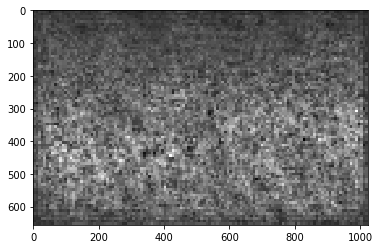

In [10]:
torch.backends.cudnn.enabled=False
img_root='./data/part_A_final/test_data/images'
gt_dmap_root='./data/part_A_final/test_data/ground_truth'
model_param_path='./checkpoints/shaghai_tech_a_best.pth'
dataset = 'data/part_A_final'
cal_mae(img_root,gt_dmap_root,model_param_path, dataset)
estimate_density_map(img_root,gt_dmap_root,model_param_path,3, dataset)


  0%|          | 0/316 [00:00<?, ?it/s]

Before backend torch.Size([1, 512, 96, 128])



  0%|          | 1/316 [00:06<34:06,  6.50s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  1%|          | 2/316 [00:13<34:31,  6.60s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  1%|          | 3/316 [00:19<34:13,  6.56s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  1%|▏         | 4/316 [00:26<33:58,  6.53s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  2%|▏         | 5/316 [00:32<33:39,  6.49s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  2%|▏         | 6/316 [00:39<33:31,  6.49s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  2%|▏         | 7/316 [00:45<33:21,  6.48s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  3%|▎         | 8/316 [00:52<33:20,  6.50s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  3%|▎         | 9/316 [00:58<33:23,  6.52s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  3%|▎         | 10/316 [01:05<33:33,  6.58s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  3%|▎         | 11/316 [01:11<33:22,  6.56s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  4%|▍         | 12/316 [01:18<33:14,  6.56s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  4%|▍         | 13/316 [01:25<33:42,  6.68s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  4%|▍         | 14/316 [01:32<34:26,  6.84s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  5%|▍         | 15/316 [01:39<34:16,  6.83s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  5%|▌         | 16/316 [01:46<34:08,  6.83s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  5%|▌         | 17/316 [01:53<33:56,  6.81s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  6%|▌         | 18/316 [01:59<33:55,  6.83s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  6%|▌         | 19/316 [02:07<34:31,  6.97s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  6%|▋         | 20/316 [02:13<34:00,  6.89s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  7%|▋         | 21/316 [02:20<33:21,  6.78s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  7%|▋         | 22/316 [02:26<32:45,  6.68s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  7%|▋         | 23/316 [02:33<32:09,  6.59s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  8%|▊         | 24/316 [02:39<31:53,  6.55s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  8%|▊         | 25/316 [02:46<32:02,  6.61s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  8%|▊         | 26/316 [02:53<32:10,  6.66s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  9%|▊         | 27/316 [03:00<32:11,  6.68s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  9%|▉         | 28/316 [03:06<32:23,  6.75s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  9%|▉         | 29/316 [03:13<31:57,  6.68s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



  9%|▉         | 30/316 [03:20<31:51,  6.68s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 10%|▉         | 31/316 [03:26<31:38,  6.66s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 10%|█         | 32/316 [03:33<31:30,  6.66s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 10%|█         | 33/316 [03:40<31:33,  6.69s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 11%|█         | 34/316 [03:46<31:22,  6.67s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 11%|█         | 35/316 [03:53<31:16,  6.68s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 11%|█▏        | 36/316 [04:00<31:00,  6.64s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 12%|█▏        | 37/316 [04:06<31:07,  6.69s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 12%|█▏        | 38/316 [04:13<30:50,  6.66s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 12%|█▏        | 39/316 [04:20<30:51,  6.68s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 13%|█▎        | 40/316 [04:27<31:01,  6.75s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 13%|█▎        | 41/316 [04:33<30:57,  6.76s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 13%|█▎        | 42/316 [04:40<30:35,  6.70s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 14%|█▎        | 43/316 [04:47<30:18,  6.66s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 14%|█▍        | 44/316 [04:53<30:18,  6.69s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 14%|█▍        | 45/316 [05:00<30:24,  6.73s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 15%|█▍        | 46/316 [05:07<30:18,  6.74s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 15%|█▍        | 47/316 [05:14<30:08,  6.72s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 15%|█▌        | 48/316 [05:20<30:06,  6.74s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 16%|█▌        | 49/316 [05:27<30:10,  6.78s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 16%|█▌        | 50/316 [05:34<29:53,  6.74s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 16%|█▌        | 51/316 [05:41<29:47,  6.75s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 16%|█▋        | 52/316 [05:47<29:42,  6.75s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 17%|█▋        | 53/316 [05:54<29:45,  6.79s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 17%|█▋        | 54/316 [06:01<29:34,  6.77s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 17%|█▋        | 55/316 [06:08<29:35,  6.80s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 18%|█▊        | 56/316 [06:15<29:28,  6.80s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 18%|█▊        | 57/316 [06:21<29:06,  6.74s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 18%|█▊        | 58/316 [06:28<28:52,  6.71s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 19%|█▊        | 59/316 [06:34<28:28,  6.65s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 19%|█▉        | 60/316 [06:41<28:29,  6.68s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 19%|█▉        | 61/316 [06:48<28:27,  6.69s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 20%|█▉        | 62/316 [06:55<28:29,  6.73s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 20%|█▉        | 63/316 [07:01<28:18,  6.71s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 20%|██        | 64/316 [07:08<28:09,  6.70s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 21%|██        | 65/316 [07:15<28:08,  6.73s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 21%|██        | 66/316 [07:21<27:55,  6.70s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 21%|██        | 67/316 [07:28<27:38,  6.66s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 22%|██▏       | 68/316 [07:35<27:55,  6.76s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 22%|██▏       | 69/316 [07:42<27:57,  6.79s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 22%|██▏       | 70/316 [07:49<27:40,  6.75s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 22%|██▏       | 71/316 [07:55<27:20,  6.70s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 23%|██▎       | 72/316 [08:02<27:46,  6.83s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 23%|██▎       | 73/316 [08:09<27:34,  6.81s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 23%|██▎       | 74/316 [08:16<27:04,  6.71s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 24%|██▎       | 75/316 [08:22<26:37,  6.63s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 24%|██▍       | 76/316 [08:29<26:37,  6.65s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 24%|██▍       | 77/316 [08:35<26:37,  6.68s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 25%|██▍       | 78/316 [08:42<26:19,  6.64s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 25%|██▌       | 79/316 [08:49<26:21,  6.67s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 25%|██▌       | 80/316 [08:56<26:41,  6.79s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 26%|██▌       | 81/316 [09:02<26:13,  6.69s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 26%|██▌       | 82/316 [09:09<26:03,  6.68s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 26%|██▋       | 83/316 [09:15<25:48,  6.64s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 27%|██▋       | 84/316 [09:22<26:03,  6.74s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 27%|██▋       | 85/316 [09:29<25:58,  6.74s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 27%|██▋       | 86/316 [09:36<25:47,  6.73s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 28%|██▊       | 87/316 [09:43<26:04,  6.83s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 28%|██▊       | 88/316 [09:49<25:37,  6.74s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 28%|██▊       | 89/316 [09:56<25:08,  6.64s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 28%|██▊       | 90/316 [10:03<25:04,  6.66s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 29%|██▉       | 91/316 [10:09<25:13,  6.73s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 29%|██▉       | 92/316 [10:16<25:14,  6.76s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 29%|██▉       | 93/316 [10:23<24:50,  6.68s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 30%|██▉       | 94/316 [10:29<24:45,  6.69s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 30%|███       | 95/316 [10:36<24:47,  6.73s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 30%|███       | 96/316 [10:43<24:25,  6.66s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 31%|███       | 97/316 [10:49<24:19,  6.67s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 31%|███       | 98/316 [10:56<24:20,  6.70s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 31%|███▏      | 99/316 [11:03<24:08,  6.67s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 32%|███▏      | 100/316 [11:10<24:06,  6.70s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 32%|███▏      | 101/316 [11:17<24:22,  6.80s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 32%|███▏      | 102/316 [11:23<24:10,  6.78s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 33%|███▎      | 103/316 [11:30<23:44,  6.69s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 33%|███▎      | 104/316 [11:36<23:22,  6.61s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 33%|███▎      | 105/316 [11:43<23:03,  6.56s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 34%|███▎      | 106/316 [11:49<23:00,  6.57s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 34%|███▍      | 107/316 [11:56<22:49,  6.55s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 34%|███▍      | 108/316 [12:03<22:54,  6.61s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 34%|███▍      | 109/316 [12:09<22:50,  6.62s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 35%|███▍      | 110/316 [12:16<23:03,  6.72s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 35%|███▌      | 111/316 [12:23<22:40,  6.64s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 35%|███▌      | 112/316 [12:29<22:38,  6.66s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 36%|███▌      | 113/316 [12:36<22:50,  6.75s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 36%|███▌      | 114/316 [12:43<22:52,  6.79s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 36%|███▋      | 115/316 [12:50<22:31,  6.73s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 37%|███▋      | 116/316 [12:56<22:13,  6.67s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 37%|███▋      | 117/316 [13:03<21:56,  6.61s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 37%|███▋      | 118/316 [13:09<21:38,  6.56s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 38%|███▊      | 119/316 [13:16<21:22,  6.51s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 38%|███▊      | 120/316 [13:22<21:15,  6.51s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 38%|███▊      | 121/316 [13:29<21:10,  6.52s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 39%|███▊      | 122/316 [13:35<21:00,  6.50s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 39%|███▉      | 123/316 [13:42<20:49,  6.47s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 39%|███▉      | 124/316 [13:48<20:41,  6.46s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 40%|███▉      | 125/316 [13:54<20:31,  6.45s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 40%|███▉      | 126/316 [14:01<20:21,  6.43s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 40%|████      | 127/316 [14:07<20:11,  6.41s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 41%|████      | 128/316 [14:14<20:05,  6.41s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 41%|████      | 129/316 [14:20<19:55,  6.40s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 41%|████      | 130/316 [14:26<19:47,  6.39s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 41%|████▏     | 131/316 [14:33<20:01,  6.49s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 42%|████▏     | 132/316 [14:40<20:13,  6.59s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 42%|████▏     | 133/316 [14:47<20:16,  6.65s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 42%|████▏     | 134/316 [14:53<20:14,  6.67s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 43%|████▎     | 135/316 [15:00<19:59,  6.63s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 43%|████▎     | 136/316 [15:06<19:44,  6.58s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 43%|████▎     | 137/316 [15:13<19:28,  6.53s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 44%|████▎     | 138/316 [15:19<19:12,  6.48s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 44%|████▍     | 139/316 [15:25<18:59,  6.44s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 44%|████▍     | 140/316 [15:32<18:48,  6.41s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 45%|████▍     | 141/316 [15:38<18:42,  6.41s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 45%|████▍     | 142/316 [15:45<18:32,  6.39s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 45%|████▌     | 143/316 [15:51<18:24,  6.39s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 46%|████▌     | 144/316 [15:58<18:30,  6.46s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 46%|████▌     | 145/316 [16:04<18:31,  6.50s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 46%|████▌     | 146/316 [16:11<18:32,  6.54s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 47%|████▋     | 147/316 [16:17<18:18,  6.50s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 47%|████▋     | 148/316 [16:24<18:34,  6.64s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 47%|████▋     | 149/316 [16:31<18:30,  6.65s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 47%|████▋     | 150/316 [16:37<18:20,  6.63s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 48%|████▊     | 151/316 [16:44<18:25,  6.70s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 48%|████▊     | 152/316 [16:51<18:22,  6.72s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 48%|████▊     | 153/316 [16:58<18:25,  6.78s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 49%|████▊     | 154/316 [17:04<17:59,  6.66s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 49%|████▉     | 155/316 [17:11<17:40,  6.59s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 49%|████▉     | 156/316 [17:17<17:25,  6.53s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 50%|████▉     | 157/316 [17:24<17:10,  6.48s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 50%|█████     | 158/316 [17:30<16:59,  6.45s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 50%|█████     | 159/316 [17:36<16:51,  6.44s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 51%|█████     | 160/316 [17:43<16:41,  6.42s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 51%|█████     | 161/316 [17:49<16:31,  6.40s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 51%|█████▏    | 162/316 [17:55<16:23,  6.39s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 52%|█████▏    | 163/316 [18:02<16:17,  6.39s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 52%|█████▏    | 164/316 [18:09<16:24,  6.48s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 52%|█████▏    | 165/316 [18:15<16:28,  6.55s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 53%|█████▎    | 166/316 [18:22<16:26,  6.58s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 53%|█████▎    | 167/316 [18:29<16:28,  6.64s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 53%|█████▎    | 168/316 [18:35<16:17,  6.61s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 53%|█████▎    | 169/316 [18:42<16:10,  6.60s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 54%|█████▍    | 170/316 [18:48<15:58,  6.56s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 54%|█████▍    | 171/316 [18:55<15:47,  6.53s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 54%|█████▍    | 172/316 [19:02<15:54,  6.63s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 55%|█████▍    | 173/316 [19:08<15:44,  6.61s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 55%|█████▌    | 174/316 [19:15<15:34,  6.58s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 55%|█████▌    | 175/316 [19:21<15:29,  6.59s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 56%|█████▌    | 176/316 [19:28<15:20,  6.57s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 56%|█████▌    | 177/316 [19:34<15:18,  6.61s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 56%|█████▋    | 178/316 [19:41<15:20,  6.67s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 57%|█████▋    | 179/316 [19:48<15:08,  6.63s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 57%|█████▋    | 180/316 [19:54<15:01,  6.63s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 57%|█████▋    | 181/316 [20:01<15:04,  6.70s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 58%|█████▊    | 182/316 [20:08<14:55,  6.69s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 58%|█████▊    | 183/316 [20:14<14:41,  6.62s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 58%|█████▊    | 184/316 [20:21<14:28,  6.58s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 59%|█████▊    | 185/316 [20:27<14:17,  6.54s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 59%|█████▉    | 186/316 [20:34<14:09,  6.54s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 59%|█████▉    | 187/316 [20:40<14:00,  6.52s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 59%|█████▉    | 188/316 [20:47<13:56,  6.53s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 60%|█████▉    | 189/316 [20:54<13:57,  6.60s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 60%|██████    | 190/316 [21:00<13:58,  6.66s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 60%|██████    | 191/316 [21:07<13:54,  6.68s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 61%|██████    | 192/316 [21:14<13:49,  6.69s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 61%|██████    | 193/316 [21:20<13:29,  6.58s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 61%|██████▏   | 194/316 [21:27<13:14,  6.51s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 62%|██████▏   | 195/316 [21:33<13:02,  6.46s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 62%|██████▏   | 196/316 [21:39<12:50,  6.42s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 62%|██████▏   | 197/316 [21:46<12:40,  6.39s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 63%|██████▎   | 198/316 [21:52<12:30,  6.36s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 63%|██████▎   | 199/316 [21:58<12:21,  6.34s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 63%|██████▎   | 200/316 [22:04<12:13,  6.33s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 64%|██████▎   | 201/316 [22:11<12:07,  6.32s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 64%|██████▍   | 202/316 [22:17<12:01,  6.33s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 64%|██████▍   | 203/316 [22:23<11:54,  6.32s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 65%|██████▍   | 204/316 [22:30<11:47,  6.32s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 65%|██████▍   | 205/316 [22:36<11:40,  6.31s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 65%|██████▌   | 206/316 [22:42<11:34,  6.32s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 66%|██████▌   | 207/316 [22:49<11:26,  6.30s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 66%|██████▌   | 208/316 [22:55<11:19,  6.30s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 66%|██████▌   | 209/316 [23:01<11:13,  6.30s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 66%|██████▋   | 210/316 [23:07<11:05,  6.28s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 67%|██████▋   | 211/316 [23:14<11:00,  6.29s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 67%|██████▋   | 212/316 [23:20<10:54,  6.30s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 67%|██████▋   | 213/316 [23:26<10:49,  6.30s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 68%|██████▊   | 214/316 [23:33<10:56,  6.44s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 68%|██████▊   | 215/316 [23:40<11:15,  6.68s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 68%|██████▊   | 216/316 [23:47<11:07,  6.68s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 69%|██████▊   | 217/316 [23:54<10:56,  6.63s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 69%|██████▉   | 218/316 [24:00<10:42,  6.56s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 69%|██████▉   | 219/316 [24:06<10:33,  6.53s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 70%|██████▉   | 220/316 [24:13<10:31,  6.57s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 70%|██████▉   | 221/316 [24:20<10:19,  6.52s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 70%|███████   | 222/316 [24:26<10:15,  6.55s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 71%|███████   | 223/316 [24:33<10:10,  6.57s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 71%|███████   | 224/316 [24:40<10:15,  6.69s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 71%|███████   | 225/316 [24:46<10:02,  6.62s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 72%|███████▏  | 226/316 [24:52<09:47,  6.53s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 72%|███████▏  | 227/316 [24:59<09:41,  6.53s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 72%|███████▏  | 228/316 [25:05<09:31,  6.50s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 72%|███████▏  | 229/316 [25:12<09:20,  6.44s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 73%|███████▎  | 230/316 [25:18<09:14,  6.45s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 73%|███████▎  | 231/316 [25:25<09:09,  6.47s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 73%|███████▎  | 232/316 [25:31<09:04,  6.48s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 74%|███████▎  | 233/316 [25:38<08:58,  6.48s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 74%|███████▍  | 234/316 [25:44<08:48,  6.44s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 74%|███████▍  | 235/316 [25:51<08:50,  6.55s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 75%|███████▍  | 236/316 [25:58<08:50,  6.63s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 75%|███████▌  | 237/316 [26:04<08:43,  6.62s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 75%|███████▌  | 238/316 [26:11<08:38,  6.65s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 76%|███████▌  | 239/316 [26:18<08:28,  6.61s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 76%|███████▌  | 240/316 [26:24<08:17,  6.54s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 76%|███████▋  | 241/316 [26:30<08:08,  6.51s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 77%|███████▋  | 242/316 [26:37<08:00,  6.49s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 77%|███████▋  | 243/316 [26:43<07:55,  6.51s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 77%|███████▋  | 244/316 [26:50<07:49,  6.52s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 78%|███████▊  | 245/316 [26:57<07:46,  6.57s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 78%|███████▊  | 246/316 [27:03<07:36,  6.52s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 78%|███████▊  | 247/316 [27:09<07:25,  6.45s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 78%|███████▊  | 248/316 [27:16<07:14,  6.39s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 79%|███████▉  | 249/316 [27:22<07:05,  6.35s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 79%|███████▉  | 250/316 [27:28<07:00,  6.37s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 79%|███████▉  | 251/316 [27:35<06:53,  6.36s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 80%|███████▉  | 252/316 [27:41<06:47,  6.36s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 80%|████████  | 253/316 [27:47<06:39,  6.35s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 80%|████████  | 254/316 [27:54<06:33,  6.35s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 81%|████████  | 255/316 [28:00<06:30,  6.40s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 81%|████████  | 256/316 [28:06<06:20,  6.34s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 81%|████████▏ | 257/316 [28:13<06:14,  6.35s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 82%|████████▏ | 258/316 [28:19<06:08,  6.34s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 82%|████████▏ | 259/316 [28:25<06:02,  6.35s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 82%|████████▏ | 260/316 [28:32<05:57,  6.39s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 83%|████████▎ | 261/316 [28:38<05:51,  6.40s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 83%|████████▎ | 262/316 [28:45<05:45,  6.41s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 83%|████████▎ | 263/316 [28:51<05:38,  6.38s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 84%|████████▎ | 264/316 [28:57<05:32,  6.40s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 84%|████████▍ | 265/316 [29:04<05:28,  6.44s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 84%|████████▍ | 266/316 [29:11<05:23,  6.47s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 84%|████████▍ | 267/316 [29:17<05:16,  6.45s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 85%|████████▍ | 268/316 [29:23<05:08,  6.43s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 85%|████████▌ | 269/316 [29:30<05:01,  6.42s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 85%|████████▌ | 270/316 [29:36<04:53,  6.38s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 86%|████████▌ | 271/316 [29:42<04:45,  6.35s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 86%|████████▌ | 272/316 [29:49<04:38,  6.32s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 86%|████████▋ | 273/316 [29:55<04:30,  6.29s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 87%|████████▋ | 274/316 [30:01<04:23,  6.28s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 87%|████████▋ | 275/316 [30:07<04:16,  6.27s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 87%|████████▋ | 276/316 [30:14<04:12,  6.30s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 88%|████████▊ | 277/316 [30:20<04:07,  6.36s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 88%|████████▊ | 278/316 [30:27<04:02,  6.39s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 88%|████████▊ | 279/316 [30:33<03:56,  6.38s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 89%|████████▊ | 280/316 [30:39<03:49,  6.36s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 89%|████████▉ | 281/316 [30:46<03:43,  6.38s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 89%|████████▉ | 282/316 [30:52<03:35,  6.33s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 90%|████████▉ | 283/316 [30:58<03:31,  6.40s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 90%|████████▉ | 284/316 [31:05<03:26,  6.47s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 90%|█████████ | 285/316 [31:12<03:20,  6.47s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 91%|█████████ | 286/316 [31:18<03:13,  6.46s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 91%|█████████ | 287/316 [31:24<03:05,  6.40s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 91%|█████████ | 288/316 [31:31<03:00,  6.43s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 91%|█████████▏| 289/316 [31:37<02:53,  6.44s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 92%|█████████▏| 290/316 [31:44<02:47,  6.45s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 92%|█████████▏| 291/316 [31:50<02:43,  6.53s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 92%|█████████▏| 292/316 [31:57<02:39,  6.63s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 93%|█████████▎| 293/316 [32:04<02:32,  6.65s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 93%|█████████▎| 294/316 [32:11<02:26,  6.64s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 93%|█████████▎| 295/316 [32:17<02:18,  6.59s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 94%|█████████▎| 296/316 [32:23<02:10,  6.54s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 94%|█████████▍| 297/316 [32:30<02:03,  6.51s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 94%|█████████▍| 298/316 [32:36<01:55,  6.43s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 95%|█████████▍| 299/316 [32:42<01:48,  6.38s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 95%|█████████▍| 300/316 [32:49<01:42,  6.38s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 95%|█████████▌| 301/316 [32:55<01:35,  6.38s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 96%|█████████▌| 302/316 [33:02<01:29,  6.42s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 96%|█████████▌| 303/316 [33:08<01:23,  6.42s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 96%|█████████▌| 304/316 [33:15<01:17,  6.42s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 97%|█████████▋| 305/316 [33:21<01:10,  6.42s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 97%|█████████▋| 306/316 [33:27<01:03,  6.40s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 97%|█████████▋| 307/316 [33:34<00:57,  6.42s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 97%|█████████▋| 308/316 [33:40<00:51,  6.42s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 98%|█████████▊| 309/316 [33:47<00:45,  6.45s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 98%|█████████▊| 310/316 [33:53<00:38,  6.47s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 98%|█████████▊| 311/316 [34:00<00:32,  6.43s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 99%|█████████▊| 312/316 [34:06<00:25,  6.41s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 99%|█████████▉| 313/316 [34:12<00:19,  6.40s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



 99%|█████████▉| 314/316 [34:19<00:12,  6.39s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



100%|█████████▉| 315/316 [34:25<00:06,  6.46s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
Before backend torch.Size([1, 512, 96, 128])



100%|██████████| 316/316 [34:32<00:00,  6.56s/it]

After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
model_param_path:./checkpoints/Shanghai_Tech_B_1_best.pth mae:110.88197403919848


Before backend torch.Size([1, 512, 96, 128])
After backend torch.Size([1, 64, 96, 128])
After output layer:  torch.Size([1, 1, 96, 128])
Final out torch.Size([1, 1, 768, 1024])
(768, 1024)


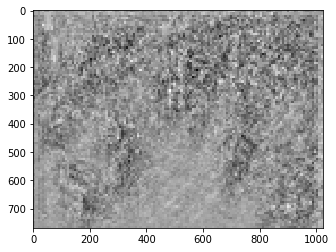

In [9]:
torch.backends.cudnn.enabled=False
img_root='./data/part_B_final/test_data/images'
gt_dmap_root='./data/part_B_final/test_data/ground_truth'
model_param_path='./checkpoints/Shanghai_Tech_B_1_best.pth'
dataset = 'data/part_B_final'
cal_mae(img_root,gt_dmap_root,model_param_path, dataset)
estimate_density_map(img_root,gt_dmap_root,model_param_path,3, dataset)